# PubMed Papers: Jargon Analysis
## Jargon Pre-Processing  
### *Create jargon vector representations of each document.* 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Get Count of Each Jargon Term in Each PubMed Document

In [7]:
jargon = pd.read_csv('../data/jargon.csv')
jargon.head()

,jargon_term
0,A/B testing
1,accuracy
2,action
3,activation function
4,active learning


In [8]:
pubmed = pd.read_csv('../data/pubmed_nltk_nostem_preproc_strings.csv').set_index('pmid')


In [9]:
pubmed.columns

Index(['date', 'citations', 'len_text', 'len_title', 'days_live', 'fulltext'], dtype='object')

In [10]:
pubmed.drop(columns=['date', 'len_text', 'len_title', 'days_live'], inplace=True)

In [11]:
# create a list to store the individual document dictionaries 
jargon_count_list = []

# iterate through each document
for document in pubmed['fulltext']:
    
    #create dictionary for each document to store the counts for each term
    doc_dict = {}

    #set up a counter variable to keep track of the total uses of all jargon terms
    total_jargon_count = 0  
    
    #iterate through the list of jargon terms
    for term in jargon['jargon_term']:
    
        #set up a counter for each individual jargon term 
        term_count = 0
        
        #count the number of times each indivivdual jargon term shows up in the document & store it 
        term_count = document.count(term)
        
        #store the term count in the individual document's dictionary
        doc_dict[term] = term_count
        
        #increment the total jargon count by this term's count
        total_jargon_count += term_count
        
        
    #add the document's total jargon count to the dictionary
    doc_dict['total_jargon_count'] = total_jargon_count
    
    #store the dictionary in the list 
    jargon_count_list.append(doc_dict)
        



In [12]:
results = pd.DataFrame(jargon_count_list)
results.index = pubmed.index
results

,A/B testing,accuracy,action,activation function,active learning,AdaGrad,agent,agglomerative clustering,AR,area under the PR curve,...,user matrix,validation,validation set,vanishing gradient problem,Wasserstein loss,weight,Weighted Alternating Least Squares (WALS),wide model,width,total_jargon_count
pmid,,,,,,,,,,,,,,,,,,,,,
22627698,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,11
22952238,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
22944687,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
22075226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
23012584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33392139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
33375609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
32378163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [13]:
df = pd.concat([pubmed, results], axis=1)

In [19]:
df.tail()

,citations,fulltext,A/B testing,accuracy,action,activation function,active learning,AdaGrad,agent,agglomerative clustering,...,user matrix,validation,validation set,vanishing gradient problem,Wasserstein loss,weight,Weighted Alternating Least Squares (WALS),wide model,width,total_jargon_count
pmid,,,,,,,,,,,,,,,,,,,,,
33392139,0,internet things artificial intelligence health...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
33375609,0,learningbased methods perception navigation gr...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
32378163,0,big data atrial fibrillation: current understa...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
33307272,0,changing landscape tumor immunology: novel too...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
33291844,0,ethnomedicine plant biotechnology machine lear...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [26]:
stats.pearsonr(df['citations'],df['total_jargon_count'] )

(0.027498692778366057, 0.14510049541405487)

There doesn't appear to be much of a relationship between the number of citations and the total jargon count. 

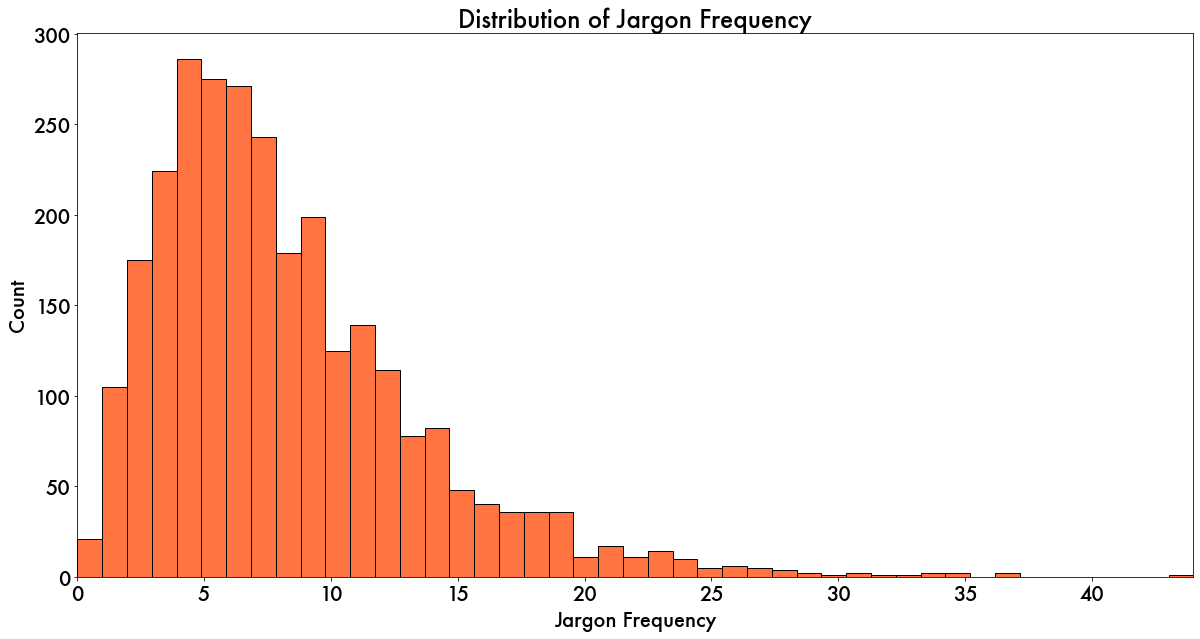

In [16]:
#Look at the distribution of the citation counts
plt.figure(figsize = (20, 10));
sns.histplot(data=df, x='total_jargon_count', color='orangered');
figurefont = {'fontname' : 'Futura'};
plt.title('Distribution of Total Jargon Frequency', fontsize = 24,**figurefont );
plt.xticks(**figurefont, fontsize = 20);
plt.yticks(**figurefont, fontsize = 20);
plt.xlabel('Jargon Frequency',**figurefont, fontsize = 20);
plt.ylabel('Count',**figurefont, fontsize = 20);
plt.xlim(0,max(df['total_jargon_count']))
plt.savefig('../figures/pubmed_total_jargon_count_histplot.jpg',  bbox_inches = "tight")

The total jargon count has a nice normal-looking distribution.

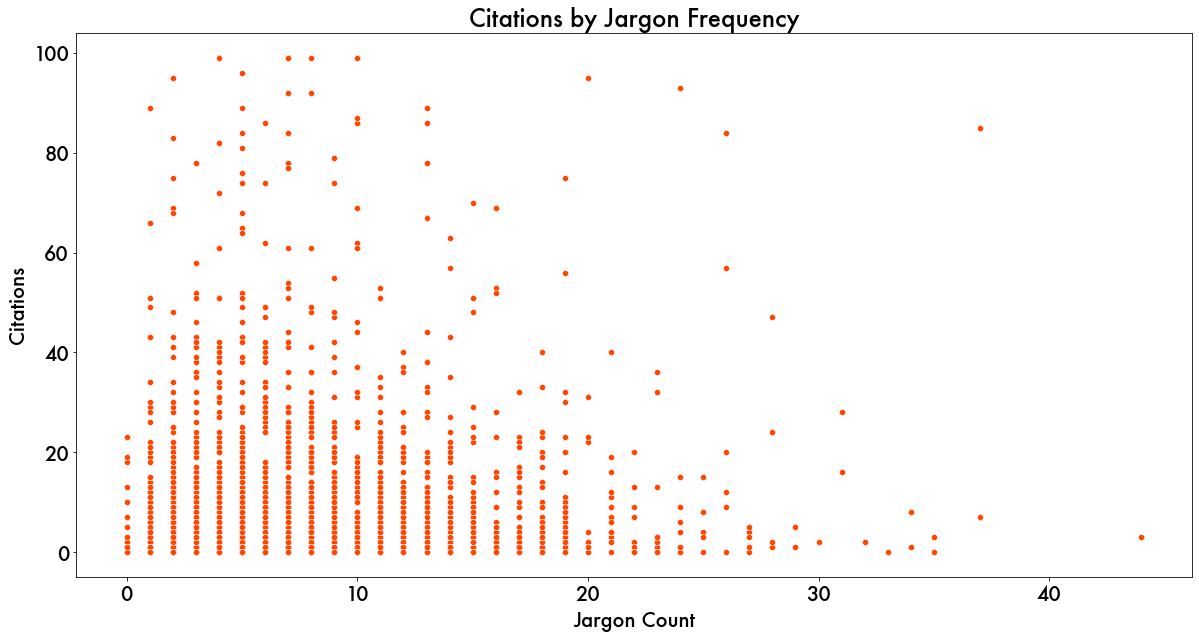

In [17]:
#scatterplot

plt.figure(figsize = (20, 10));
sns.scatterplot(data=df, x='total_jargon_count', y='citations', color='orangered');
figurefont = {'fontname' : 'Futura'};
plt.title('Citations by Jargon Frequency', fontsize = 24,**figurefont );
plt.xticks(**figurefont, fontsize = 20);
plt.yticks(**figurefont, fontsize = 20);
plt.xlabel('Jargon Count',**figurefont, fontsize = 20);
plt.ylabel('Citations',**figurefont, fontsize = 20);
plt.savefig('../figures/pubmed_citations_jargon_freq_scatterplot.jpg',  bbox_inches = "tight")

In [18]:
#save vectorized data 
df.to_csv('../data/pubmed_vectorized_jargon.csv')